In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

import helpers

In [2]:
# read conderc data
experiment_file = ofb.ResultsFromDatabase('experiment.h5', path='results_database')

In [3]:
# read openmc results in results_database/
openmc_endfb80_file = ofb.ResultsFromDatabase('openmc-0-14-0_endfb80.h5', path='results_database')

In [4]:
# read mcnp results in results_database/
mcnp_endfb80_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_endfb80.h5', path='results_database')
mcnp_jeff33_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jeff33.h5', path='results_database')
mcnp_jendl40_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jendl40.h5', path='results_database')

In [5]:
# experiment from results_database/
n21 = experiment_file.get_tally_dataframe('nspectrum')
g41 = experiment_file.get_tally_dataframe('gspectrum')

In [6]:
# openmc from results_database/
openmc_endfb80_n21 = openmc_endfb80_file.get_tally_dataframe('nspectrum')
openmc_endfb80_g41 = openmc_endfb80_file.get_tally_dataframe('gspectrum')

In [7]:
# mcnp from results_database/
mcnp_endfb80_n21 = mcnp_endfb80_file.get_tally_dataframe('nspectrum')
mcnp_endfb80_g41 = mcnp_endfb80_file.get_tally_dataframe('gspectrum')

mcnp_jeff33_n21 = mcnp_jeff33_file.get_tally_dataframe('nspectrum')
mcnp_jeff33_g41 = mcnp_jeff33_file.get_tally_dataframe('gspectrum')

mcnp_jendl40_n21 = mcnp_jendl40_file.get_tally_dataframe('nspectrum')
mcnp_jendl40_g41 = mcnp_jendl40_file.get_tally_dataframe('gspectrum')

In [8]:
# preprocessing
n21_mean, n21_stddev = helpers.process_n_tally(n21)
g41_mean, g41_stddev = helpers.process_g_tally(g41)

mcnp_endfb80_n21_mean, mcnp_endfb80_n21_stddev = helpers.process_n_tally(mcnp_endfb80_n21)
mcnp_endfb80_g41_mean, mcnp_endfb80_g41_stddev = helpers.process_g_tally(mcnp_endfb80_g41)

mcnp_jeff33_n21_mean, mcnp_jeff33_n21_stddev = helpers.process_n_tally(mcnp_jeff33_n21)
mcnp_jeff33_g41_mean, mcnp_jeff33_g41_stddev = helpers.process_g_tally(mcnp_jeff33_g41)

mcnp_jendl40_n21_mean, mcnp_jendl40_n21_stddev = helpers.process_n_tally(mcnp_jendl40_n21)
mcnp_jendl40_g41_mean, mcnp_jendl40_g41_stddev = helpers.process_g_tally(mcnp_jendl40_g41)

openmc_endfb80_n21_mean, openmc_endfb80_n21_stddev = helpers.process_n_tally(openmc_endfb80_n21)
openmc_endfb80_g41_mean, openmc_endfb80_g41_stddev = helpers.process_g_tally(openmc_endfb80_g41)

In [9]:
ylabel1 = "Neutron leakage spectrum\nper unit lethargy [1/u/n]"
ylabel2 = "Photon leakage spectrum\nper unit lethargy [#/cm\u00B2/s/MeV]"
ylabel3 = "Neutron leakage spectrum\nper unit lethargy [ratio vs experiment]"
ylabel4 = "Photon leakage spectrum\nper unit lethargy [ratio vs experiment]"

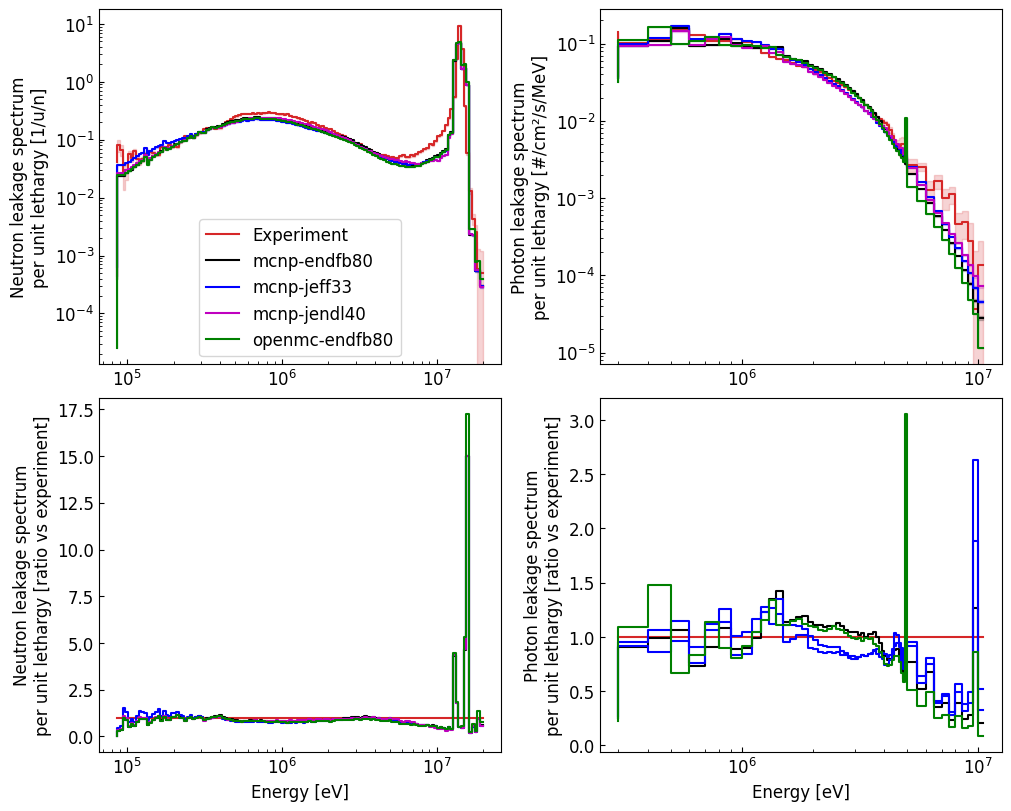

In [10]:
# plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), constrained_layout=True)

ax1.step(n21['energy low [eV]'], n21_mean, lw=1.5, c='tab:red', label='Experiment')
ax1.fill_between(n21['energy low [eV]'], n21_mean - n21_stddev, 
                 n21_mean + n21_stddev, step='pre', color='tab:red', alpha=0.2)
ax1.step(mcnp_endfb80_n21['energy low [eV]'], mcnp_endfb80_n21_mean, lw=1.5, c='k', label='mcnp-endfb80')
ax1.fill_between(mcnp_endfb80_n21['energy low [eV]'], mcnp_endfb80_n21_mean - mcnp_endfb80_n21_stddev, 
                 mcnp_endfb80_n21_mean + mcnp_endfb80_n21_stddev, step='pre', color='k', alpha=0.2)
ax1.step(mcnp_jeff33_n21['energy low [eV]'], mcnp_jeff33_n21_mean, lw=1.5, c='b', label='mcnp-jeff33')
ax1.fill_between(mcnp_jeff33_n21['energy low [eV]'], mcnp_jeff33_n21_mean - mcnp_jeff33_n21_stddev, 
                 mcnp_jeff33_n21_mean + mcnp_jeff33_n21_stddev, step='pre', color='b', alpha=0.2)
ax1.step(mcnp_jendl40_n21['energy low [eV]'], mcnp_jendl40_n21_mean, lw=1.5, c='m', label='mcnp-jendl40')
ax1.fill_between(mcnp_jendl40_n21['energy low [eV]'], mcnp_jendl40_n21_mean - mcnp_jendl40_n21_stddev, 
                 mcnp_jendl40_n21_mean + mcnp_jendl40_n21_stddev, step='pre', color='m', alpha=0.2)
ax1.step(openmc_endfb80_n21['energy low [eV]'], openmc_endfb80_n21_mean, lw=1.5, c='g', label='openmc-endfb80')
ax1.fill_between(openmc_endfb80_n21['energy low [eV]'], openmc_endfb80_n21_mean - openmc_endfb80_n21_stddev, 
                 openmc_endfb80_n21_mean + openmc_endfb80_n21_stddev, step='pre', color='g', alpha=0.2)

ax2.step(g41['energy low [eV]'], g41_mean, lw=1.5, c='tab:red', label='Experiment')
ax2.fill_between(g41['energy low [eV]'], g41_mean - g41_stddev, 
                 g41_mean + g41_stddev, step='pre', color='tab:red', alpha=0.2)
ax2.step(mcnp_endfb80_g41['energy low [eV]'], mcnp_endfb80_g41_mean, lw=1.5, c='k', label='mcnp-endfb80')
ax2.fill_between(mcnp_endfb80_g41['energy low [eV]'], mcnp_endfb80_g41_mean - mcnp_endfb80_g41_stddev, 
                 mcnp_endfb80_g41_mean + mcnp_endfb80_g41_stddev, step='pre', color='k', alpha=0.2)
ax2.step(mcnp_jeff33_g41['energy low [eV]'], mcnp_jeff33_g41_mean, lw=1.5, c='b', label='mcnp-jeff33')
ax2.fill_between(mcnp_jeff33_g41['energy low [eV]'], mcnp_jeff33_g41_mean - mcnp_jeff33_g41_stddev, 
                 mcnp_jeff33_g41_mean + mcnp_jeff33_g41_stddev, step='pre', color='b', alpha=0.2)
ax2.step(mcnp_jendl40_g41['energy low [eV]'], mcnp_jendl40_g41_mean, lw=1.5, c='m', label='mcnp-jendl40')
ax2.fill_between(mcnp_jendl40_g41['energy low [eV]'], mcnp_jendl40_g41_mean - mcnp_jendl40_g41_stddev, 
                 mcnp_jendl40_g41_mean + mcnp_jendl40_g41_stddev, step='pre', color='m', alpha=0.2)
ax2.step(openmc_endfb80_g41['energy low [eV]'], openmc_endfb80_g41_mean, lw=1.5, c='g', label='openmc-endfb80')
ax2.fill_between(openmc_endfb80_g41['energy low [eV]'], openmc_endfb80_g41_mean - openmc_endfb80_g41_stddev, 
                 openmc_endfb80_g41_mean + openmc_endfb80_g41_stddev, step='pre', color='g', alpha=0.2)

ax1.tick_params(axis='both', which='both', direction='in', labelsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(ylabel1, fontsize=12)
ax1.legend(fontsize=12, loc='lower center')

ax2.tick_params(axis='both', which='both', direction='in', labelsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel(ylabel2, fontsize=12)

ax3.step(n21['energy low [eV]'], n21_mean/n21_mean, lw=1.5, c='tab:red', label='Experiment')
ax3.step(mcnp_endfb80_n21['energy low [eV]'], mcnp_endfb80_n21_mean/n21_mean, lw=1.5, c='k', label='mcnp-endfb80')
ax3.step(mcnp_jeff33_n21['energy low [eV]'], mcnp_jeff33_n21_mean/n21_mean, lw=1.5, c='b', label='mcnp-jeff33')
ax3.step(mcnp_jendl40_n21['energy low [eV]'], mcnp_jendl40_n21_mean/n21_mean, lw=1.5, c='m', label='mcnp-jendl40')
ax3.step(openmc_endfb80_n21['energy low [eV]'], openmc_endfb80_n21_mean/n21_mean, lw=1.5, c='g', label='openmc-endfb80')

ax4.step(g41['energy low [eV]'], g41_mean/g41_mean, lw=1.5, c='tab:red', label='Experiment')
ax4.step(mcnp_endfb80_g41['energy low [eV]'], mcnp_endfb80_g41_mean/g41_mean, lw=1.5, c='k', label='mcnp-endfb80')
ax4.step(mcnp_jeff33_g41['energy low [eV]'], mcnp_jeff33_g41_mean/g41_mean, lw=1.5, c='b', label='mcnp-jeff33')
ax4.step(mcnp_jendl40_g41['energy low [eV]'], mcnp_jendl40_g41_mean/g41_mean, lw=1.5, c='b', label='mcnp-jendl40')
ax4.step(openmc_endfb80_g41['energy low [eV]'], openmc_endfb80_g41_mean/g41_mean, lw=1.5, c='g', label='openmc-endfb80')

ax3.tick_params(axis='both', which='both', direction='in', labelsize=12)
ax3.set_xscale('log')
ax3.set_ylabel(ylabel3, fontsize=12)
ax3.set_xlabel('Energy [eV]', fontsize=12)

ax4.tick_params(axis='both', which='both', direction='in', labelsize=12)
ax4.set_xscale('log')
ax4.set_ylabel(ylabel4, fontsize=12)
ax4.set_xlabel('Energy [eV]', fontsize=12)

plt.show()

In [11]:
ylabel = r'Neutron flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'nspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

In [13]:
# preprocessing
n21 = ofb.rescale_to_lethargy(n21)
openmc_endfb80_n21 = ofb.rescale_to_lethargy(openmc_endfb80_n21)
    
# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel, dtype_label=f'detector {i}')
plot.add_reference_results(reference_data=n21, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_n21, color='tab:red', alpha=1, label='openmc-endfb80')

AttributeError: module 'openmc_fusion_benchmarks' has no attribute 'rescale_to_lethargy'